In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity, mean_squared_error

In [6]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [7]:
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)
image_noise_gauss = cv2.add(image_gray, noise_gauss)

noise = np.random.randint(0, 101, size=(image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)
image_sp = image_gray.copy()
image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

In [8]:
print("2. Тестирование фильтров для ГАУССОВА шума:")
results_gauss = {}

for ksize in [3, 5, 7]:
    filtered = cv2.medianBlur(image_noise_gauss, ksize)
    mse = mean_squared_error(image_gray, filtered)
    ssim = structural_similarity(image_gray, filtered)
    results_gauss[f'median_{ksize}'] = (mse, ssim)
    print(f"Медианный {ksize}x{ksize}: MSE={mse:.1f}, SSIM={ssim:.4f}")

for ksize in [3, 5]:
    for sigma in [1.0, 2.0]:
        filtered = cv2.GaussianBlur(image_noise_gauss, (ksize, ksize), sigma)
        mse = mean_squared_error(image_gray, filtered)
        ssim = structural_similarity(image_gray, filtered)
        results_gauss[f'gauss_{ksize}_{sigma}'] = (mse, ssim)
        print(f"Гауссов {ksize}x{ksize}, sigma={sigma}: MSE={mse:.1f}, SSIM={ssim:.4f}")

filtered = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
mse = mean_squared_error(image_gray, filtered)
ssim = structural_similarity(image_gray, filtered)
results_gauss['bilateral'] = (mse, ssim)
print(f"Билатеральный: MSE={mse:.1f}, SSIM={ssim:.4f}")

filtered = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)
mse = mean_squared_error(image_gray, filtered)
ssim = structural_similarity(image_gray, filtered)
results_gauss['nlm'] = (mse, ssim)
print(f"Нелокальные средние: MSE={mse:.1f}, SSIM={ssim:.4f}")

2. Тестирование фильтров для ГАУССОВА шума:
Медианный 3x3: MSE=1035.6, SSIM=0.4294
Медианный 5x5: MSE=704.6, SSIM=0.4706
Медианный 7x7: MSE=680.4, SSIM=0.4341
Гауссов 3x3, sigma=1.0: MSE=1867.0, SSIM=0.4494
Гауссов 3x3, sigma=2.0: MSE=1848.0, SSIM=0.4455
Гауссов 5x5, sigma=1.0: MSE=1775.4, SSIM=0.4826
Гауссов 5x5, sigma=2.0: MSE=1734.0, SSIM=0.4739
Билатеральный: MSE=1835.8, SSIM=0.3151
Нелокальные средние: MSE=4221.6, SSIM=0.1877


In [9]:
print("\n3. Тестирование фильтров для ИМПУЛЬСНОГО шума:")
results_sp = {}

for ksize in [3, 5, 7]:
    filtered = cv2.medianBlur(image_sp, ksize)
    mse = mean_squared_error(image_gray, filtered)
    ssim = structural_similarity(image_gray, filtered)
    results_sp[f'median_{ksize}'] = (mse, ssim)
    print(f"Медианный {ksize}x{ksize}: MSE={mse:.1f}, SSIM={ssim:.4f}")

for ksize in [3, 5]:
    for sigma in [1.0, 2.0]:
        filtered = cv2.GaussianBlur(image_sp, (ksize, ksize), sigma)
        mse = mean_squared_error(image_gray, filtered)
        ssim = structural_similarity(image_gray, filtered)
        results_sp[f'gauss_{ksize}_{sigma}'] = (mse, ssim)
        print(f"Гауссов {ksize}x{ksize}, sigma={sigma}: MSE={mse:.1f}, SSIM={ssim:.4f}")

filtered = cv2.bilateralFilter(image_sp, 9, 75, 75)
mse = mean_squared_error(image_gray, filtered)
ssim = structural_similarity(image_gray, filtered)
results_sp['bilateral'] = (mse, ssim)
print(f"Билатеральный: MSE={mse:.1f}, SSIM={ssim:.4f}")

filtered = cv2.fastNlMeansDenoising(image_sp, h=20)
mse = mean_squared_error(image_gray, filtered)
ssim = structural_similarity(image_gray, filtered)
results_sp['nlm'] = (mse, ssim)
print(f"Нелокальные средние: MSE={mse:.1f}, SSIM={ssim:.4f}")


3. Тестирование фильтров для ИМПУЛЬСНОГО шума:
Медианный 3x3: MSE=95.7, SSIM=0.8163
Медианный 5x5: MSE=194.1, SSIM=0.6332
Медианный 7x7: MSE=260.1, SSIM=0.5224
Гауссов 3x3, sigma=1.0: MSE=124.7, SSIM=0.7745
Гауссов 3x3, sigma=2.0: MSE=139.6, SSIM=0.7435
Гауссов 5x5, sigma=1.0: MSE=135.7, SSIM=0.7494
Гауссов 5x5, sigma=2.0: MSE=191.3, SSIM=0.6415
Билатеральный: MSE=265.1, SSIM=0.5208
Нелокальные средние: MSE=219.5, SSIM=0.5934


In [10]:
# 4. Выяснить лучшие фильтры для каждого типа шума

best_mse_gauss = min(results_gauss.items(), key=lambda x: x[1][0])
best_ssim_gauss = max(results_gauss.items(), key=lambda x: x[1][1])

print(f"ДЛЯ ГАУССОВА ШУМА:")
print(f"  По MSE:  {best_mse_gauss[0]} - {best_mse_gauss[1][0]:.1f}")
print(f"  По SSIM: {best_ssim_gauss[0]} - {best_ssim_gauss[1][1]:.4f}")

best_mse_sp = min(results_sp.items(), key=lambda x: x[1][0])
best_ssim_sp = max(results_sp.items(), key=lambda x: x[1][1])

print(f"\nДЛЯ ИМПУЛЬСНОГО ШУМА:")
print(f"  По MSE:  {best_mse_sp[0]} - {best_mse_sp[1][0]:.1f}")
print(f"  По SSIM: {best_ssim_sp[0]} - {best_ssim_sp[1][1]:.4f}")

ДЛЯ ГАУССОВА ШУМА:
  По MSE:  median_7 - 680.4
  По SSIM: gauss_5_1.0 - 0.4826

ДЛЯ ИМПУЛЬСНОГО ШУМА:
  По MSE:  median_3 - 95.7
  По SSIM: median_3 - 0.8163


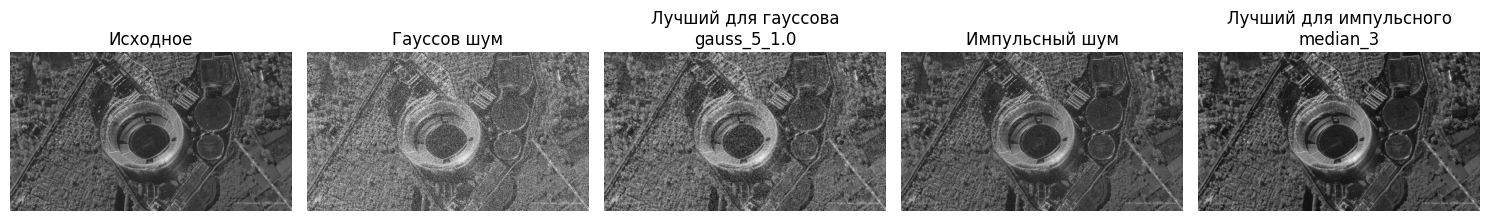

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(image_noise_gauss, cmap='gray')
plt.title('Гауссов шум')
plt.axis('off')

if 'median' in best_ssim_gauss[0]:
    ksize = int(best_ssim_gauss[0].split('_')[1])
    best_gauss_result = cv2.medianBlur(image_noise_gauss, ksize)
elif 'gauss' in best_ssim_gauss[0]:
    ksize = int(best_ssim_gauss[0].split('_')[1])
    sigma = float(best_ssim_gauss[0].split('_')[2])
    best_gauss_result = cv2.GaussianBlur(image_noise_gauss, (ksize, ksize), sigma)
elif 'bilateral' in best_ssim_gauss[0]:
    best_gauss_result = cv2.bilateralFilter(image_noise_gauss, 9, 75, 75)
else:
    best_gauss_result = cv2.fastNlMeansDenoising(image_noise_gauss, h=20)

plt.subplot(1, 5, 3)
plt.imshow(best_gauss_result, cmap='gray')
plt.title(f'Лучший для гауссова\n{best_ssim_gauss[0]}')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(image_sp, cmap='gray')
plt.title('Импульсный шум')
plt.axis('off')

if 'median' in best_ssim_sp[0]:
    ksize = int(best_ssim_sp[0].split('_')[1])
    best_sp_result = cv2.medianBlur(image_sp, ksize)
elif 'gauss' in best_ssim_sp[0]:
    ksize = int(best_ssim_sp[0].split('_')[1])
    sigma = float(best_ssim_sp[0].split('_')[2])
    best_sp_result = cv2.GaussianBlur(image_sp, (ksize, ksize), sigma)
elif 'bilateral' in best_ssim_sp[0]:
    best_sp_result = cv2.bilateralFilter(image_sp, 9, 75, 75)
else:
    best_sp_result = cv2.fastNlMeansDenoising(image_sp, h=20)

plt.subplot(1, 5, 5)
plt.imshow(best_sp_result, cmap='gray')
plt.title(f'Лучший для импульсного\n{best_ssim_sp[0]}')
plt.axis('off')

plt.tight_layout()
plt.show()